In [107]:
import re
import math
import nltk
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from selenium import webdriver
from getpass import getpass
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from wordcloud import WordCloud
from textblob import TextBlob

#stopwords
stop = set(stopwords.words('english'))

In [108]:
# PATH = "C:\Program Files (x86)\chromedriver.exe" #path to the chrome driver

In [109]:
# driver = webdriver.Chrome(PATH)

In [110]:
# driver.get("https://www.twitter.com/login")#twitter login page
# driver.maximize_window() #To maximize the window

# #Inputing username and returning the value
# sleep(5)
# username = driver.find_element("xpath",'//input[@name="text"]')
# print("Enter username")
# my_username = getpass()
# username.send_keys(my_username)
# username.send_keys(Keys.RETURN)

# #twitter login password
# print("Enter password")
# my_password = getpass()
# password = driver.find_element("xpath",'//input[@name="password"]')#Finding the password field
# password.send_keys(my_password)
# password.send_keys(Keys.RETURN)

# sleep(6)
# #looking for the searchbox
# search = driver.find_element("xpath", '//input[@aria-label="Search query"]')
# search.send_keys("2023elections")#Inputing obidatti into the search box
# search.send_keys(Keys.RETURN)

In [111]:
# driver.find_element("link text",'Latest').click() #Clicking on "latest"

In [112]:
def get_tweet_details(tweet):
    #Getting the display name on the tweet
    disp_name = tweet.find_element("xpath", './/span').text
    #disp_name = tweet.find_element("xpath",'.//div[1]/div[1]/div[2]/div[2]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]//span').text
    
    #The date the tweet was posted
    #Added a NoSuchElement exception because of sponsored posts which have no dates
    try:
        postdate = tweet.find_element("xpath",'.//time').get_attribute('datetime')
    except NoSuchElementException:
        postdate = "Sponsored post"
        
    #Getting the username
    user_name = tweet.find_element("xpath", './/span[contains(text(),"@")]').text
    
    #The content of the tweet
    #some tweets do not have a content such as spaces
    try:
        content = tweet.find_element("xpath", './/div[@data-testid="tweetText"]').text
    except NoSuchElementException:
        content = "Twitter Space"
    
    #The number of likes the tweet has
    likes = tweet.find_element("xpath", './/div[@data-testid="like"]').text
    
    #The number of comments
    comments = tweet.find_element("xpath", './/div[@data-testid="reply"]').text
    
    #The number of retweets
    retweets = tweet.find_element("xpath", './/div[@data-testid="retweet"]').text
    
    #The reach of the tweet
    try:
        reach = tweet.find_element("xpath", './/div[1]/div[1]/div[2]/div[2]/div[4]/div[1]/div[4]//span').text
    except NoSuchElementException:
        return
    
    #The reach of the tweet
    
    tweet_details = (postdate, disp_name, user_name, content, likes, comments, retweets, reach) 
    return tweet_details

In [113]:
# data = [] #Empty list

# #Adding a tweet id to prevent duplicates
# tweet_ids = set()

# #Last position on the webpage to indicate when it gets to the bottom of the webpage
# last_position = driver.execute_script("return window.pageYOffset;")
# scrolling=True

# while scrolling:
#     #find each tweet using the "data-testid = "tweet"
#     tweets = driver.find_elements("xpath", '//article[@data-testid="tweet"]')
#     j=1
#     for tweet in tweets: #Iterate through the first 100 tweets
#         tweet_details = get_tweet_details(tweet)
#         if tweet_details:
#             #To avoid duplications
#             tweet_id = ''.join(tweet_details) #tweet id becomes the string of all the tweet details
#             if tweet_id not in tweet_ids: #only append tweets that havent already been added
#                 tweet_ids.add(tweet_id)
#                 data.append(tweet_details) #Add details to list
#                 if j%10 == 0:
#                     print(j)
#         j+=1      
                
#     scroll_attempt = 0
#     while True: #infinite loop
#         #scroll to the bottom of the webpage
#         driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
#         sleep(10) #Pause for two seconds so tweets will load
#         #check scroll position
#         curr_position = driver.execute_script("return window.pageYOffset;")
#         if last_position == curr_position:
#             scroll_attempt += 1
            
#             if scroll_attempt >= 3: #Indicates the bottom of the webpage
#                 scrolling = False
#                 break #stop loading tweets
#             else:
#                 sleep(10)
                
#         else:
#             last_position = curr_position
#             break

In [114]:
# len(data)

In [115]:
# data

In [116]:
# df = pd.DataFrame(data, columns=["Postdate", "Display name", "Username", "Content", "Likes", "Comments", "Retweets", "Reach"])

In [117]:
# df.to_csv("2023elections.csv", index=False)

In [118]:
df = pd.read_csv(r"C:\Users\hp\Desktop\anaconda\2023elections.csv")

In [119]:
df["Display name"].value_counts()

Naija Loud Mouth     850
Situation Room        24
DITOGAMES             21
AllNews Nigeria       17
Roving Naija          11
                    ... 
Bana Borbe             1
i JUDGE (o2)           1
Deborah Iwunna         1
The Zimbabwe Mail      1
Dennis Pantazelos      1
Name: Display name, Length: 679, dtype: int64

Naija Loud mouth had 30 times more tweets than the second tweep

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postdate      1789 non-null   object 
 1   Display name  1788 non-null   object 
 2   Username      1789 non-null   object 
 3   Content       1789 non-null   object 
 4   Likes         450 non-null    object 
 5   Comments      222 non-null    float64
 6   Retweets      312 non-null    object 
 7   Reach         1789 non-null   object 
dtypes: float64(1), object(7)
memory usage: 111.9+ KB


In [121]:
df.head()

,Postdate,Display name,Username,Content,Likes,Comments,Retweets,Reach
0,2023-03-17T23:07:39.000Z,Engr. Tanimu Abdu GSS Giwa,@Tanimua62012354,Yau ne 18/03/2023 ranar Zaben 2023 elections. ...,NaN,NaN,NaN,2
1,Sponsored post,DITOGAMES,@DITOGAMESch,"If you have a mouse, you will never turn off y...",13K,892.0,"2,059",19.4M
2,2023-03-17T23:06:16.000Z,Oluwaseyi Jibodu’s Blog ✪,@TheSeyiBlogNG,It's #NigerianElections2023 Guber and SHA poll...,1,NaN,NaN,25
3,2023-03-17T22:55:21.000Z,Dan S #HealthcareVoter,@Dsquared75,#WISupremeCourt #2023Elections #CourtsMatter a...,NaN,NaN,NaN,52
4,2023-03-17T22:54:36.000Z,Naijareel.comᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠ,@naijareel,"2023 Elections: Falz, others allegedly assault...",NaN,NaN,NaN,1


In [122]:
df_copy = df.copy()

In [123]:
# df.to_csv("obidatti.csv", index=False)

### Data Cleaning
 - Filling the null values in the Likes, comments and REach columns with 0
 - Converting the Ks in text to numbers

In [124]:
df_copy.isnull().sum()

Postdate           0
Display name       1
Username           0
Content            0
Likes           1339
Comments        1567
Retweets        1477
Reach              0
dtype: int64

In [125]:
df_copy[['Likes', 'Comments', 'Retweets', 'Reach']] = df_copy[['Likes', 'Comments', 'Retweets', 'Reach']].fillna(0)

In [126]:
df_copy.isnull().sum()

Postdate        0
Display name    1
Username        0
Content         0
Likes           0
Comments        0
Retweets        0
Reach           0
dtype: int64

In [127]:
# def text_to_digits(text):
#     """
#     args: This function takes a text
#           of numbers
    
#     returns: a float of numbers
#              with the k,m,b suffices
#              removed and also removes 
#              the commas
#     """
#     #suffix dictionary
#     suff = {
#         "k": 1000,
#         "m": 1000000,
#         "b": 1000000000
#     }
    
#     #if the last valuesin the string is a key in the suffix dictionary
#     if text == "":
#         return 0
#     elif text[-1].lower() in suff.keys():
#         text_suff, text_val = text[-1], text[:-1] #split
#         return float(text_val)*suff[text_suff.lower()]
    
#     else:
#         #split the text using the comma and join, then convert to float
#         return float("".join(text.split(',')))

In [130]:
def text_to_digits(text):
    """
    args: This function takes a text
          of numbers
    
    returns: a float of numbers
             with the k,m,b suffices
             removed and also removes 
             the commas
    """
    #suffix dictionary
    suff = {
        "k": 1000,
        "m": 1000000,
        "b": 1000000000
    }
    
    #if the last valuesin the string is a key in the suffix dictionary
    if text == 0:
        return float(text)
    elif str(text)[-1].lower() in suff.keys():
        text_suff, text_val = text[-1], text[:-1] #split
        return float(text_val)*suff[text_suff.lower()]
    else:
        #split the text using the comma and join, then convert to float
        return float("".join(str(text).split(',')))

In [131]:
#mapping the likes column to the text to digits function
df_copy["Likes"] = df_copy["Likes"].map(text_to_digits)

#mapping the comments column to the text to digits function
df_copy["Comments"] = df_copy["Comments"].map(text_to_digits)

#mapping the retweets column to the text to digits function
df_copy["Retweets"] = df_copy["Retweets"].map(text_to_digits)

#mapping the reach column to the text to digits function
df_copy["Reach"] = df_copy["Reach"].map(text_to_digits) 

In [132]:
# df_copy.to_csv("Obidattireal.csv", index=False)

In [133]:
df_copy.head()

,Postdate,Display name,Username,Content,Likes,Comments,Retweets,Reach
0,2023-03-17T23:07:39.000Z,Engr. Tanimu Abdu GSS Giwa,@Tanimua62012354,Yau ne 18/03/2023 ranar Zaben 2023 elections. ...,0.0,0.0,0.0,2.0
1,Sponsored post,DITOGAMES,@DITOGAMESch,"If you have a mouse, you will never turn off y...",13000.0,892.0,2059.0,19400000.0
2,2023-03-17T23:06:16.000Z,Oluwaseyi Jibodu’s Blog ✪,@TheSeyiBlogNG,It's #NigerianElections2023 Guber and SHA poll...,1.0,0.0,0.0,25.0
3,2023-03-17T22:55:21.000Z,Dan S #HealthcareVoter,@Dsquared75,#WISupremeCourt #2023Elections #CourtsMatter a...,0.0,0.0,0.0,52.0
4,2023-03-17T22:54:36.000Z,Naijareel.comᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠ,@naijareel,"2023 Elections: Falz, others allegedly assault...",0.0,0.0,0.0,1.0


In [134]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postdate      1789 non-null   object 
 1   Display name  1788 non-null   object 
 2   Username      1789 non-null   object 
 3   Content       1789 non-null   object 
 4   Likes         1789 non-null   float64
 5   Comments      1789 non-null   float64
 6   Retweets      1789 non-null   float64
 7   Reach         1789 non-null   float64
dtypes: float64(4), object(4)
memory usage: 111.9+ KB


### Text processing

In [135]:
def clean_text(text):
    cleaned_text = []
    
    text = re.sub(r'@[A-Z|a-z|0-9]+', '', text)#Remove handles from the text
    text = re.sub(r'[#|.|,|)|(]', '', text)#remove hash and punctuations from hashtags
    text = re.sub(r'https?:\/\/\S+', '', text)#remove hyperlinks
    
    #splitting the content into words
    words = text.split(" ")
    
    #removing stopwords
    clean_words = []
    for word in words:
        if (word.lower() not in stop):#Do not include stopwords
            clean_words.append(word)#add the word to the empty list
        else:
            continue
            
    return " ".join(clean_words)  #Join all the words together and return the string

In [136]:
df_copy["Clean content"] = df_copy["Content"].apply(clean_text)

In [137]:
df_copy["Clean content"]

0       Yau ne 18/03/2023 ranar Zaben 2023 elections A...
1                               mouse never turn computer
2       NigerianElections2023 Guber SHA polls Morning!...
3       WISupremeCourt 2023Elections CourtsMatter Defe...
4       2023 Elections: Falz others allegedly assaulte...
                              ...                        
1784                              Dakum2023 2023Elections
1785    God's Godswill Akpabio!! GodswillAkapabio Sena...
1786    Since 2018 elections held June 2023 elections ...
1787    God's Godswill Akpabio!! GodswillAkapabio Sena...
1788    God's Godswill Akpabio!! GodswillAkapabio Sena...
Name: Clean content, Length: 1789, dtype: object

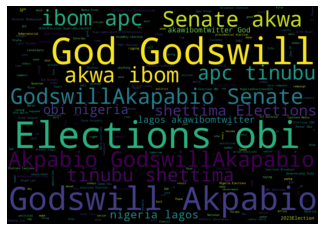

In [138]:
#wordcloud
words = ' '.join([tweet for tweet in df_copy["Clean content"]]) #Join all the strings together
word_cloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=119, background_color="black").generate(words)

plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis('off')#Remove axis
plt.show()#show figure

In [139]:
#Function to get the polarity of the tweets
def get_polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

#Create new column called polarity
df_copy["Polarity"] = df_copy["Content"].apply(get_polarity)

In [140]:
#Function to get the sentiment of the tweet
def get_analysis(polarity):
    if polarity < 0: #if polarity is less than 1
        return "Negative"
    elif polarity == 0: #if polarity is 0
        return "Neutral"
    else:
        return "Positive" #if polarity is greater than zero
    
df_copy["Analysis"] = df_copy["Polarity"].apply(get_analysis)

In [141]:
df_copy.head()

,Postdate,Display name,Username,Content,Likes,Comments,Retweets,Reach,Clean content,Polarity,Analysis
0,2023-03-17T23:07:39.000Z,Engr. Tanimu Abdu GSS Giwa,@Tanimua62012354,Yau ne 18/03/2023 ranar Zaben 2023 elections. ...,0.0,0.0,0.0,2.0,Yau ne 18/03/2023 ranar Zaben 2023 elections A...,0.000000,Neutral
1,Sponsored post,DITOGAMES,@DITOGAMESch,"If you have a mouse, you will never turn off y...",13000.0,892.0,2059.0,19400000.0,mouse never turn computer,0.000000,Neutral
2,2023-03-17T23:06:16.000Z,Oluwaseyi Jibodu’s Blog ✪,@TheSeyiBlogNG,It's #NigerianElections2023 Guber and SHA poll...,1.0,0.0,0.0,25.0,NigerianElections2023 Guber SHA polls Morning!...,0.000000,Neutral
3,2023-03-17T22:55:21.000Z,Dan S #HealthcareVoter,@Dsquared75,#WISupremeCourt #2023Elections #CourtsMatter a...,0.0,0.0,0.0,52.0,WISupremeCourt 2023Elections CourtsMatter Defe...,0.116667,Positive
4,2023-03-17T22:54:36.000Z,Naijareel.comᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠ,@naijareel,"2023 Elections: Falz, others allegedly assault...",0.0,0.0,0.0,1.0,2023 Elections: Falz others allegedly assaulte...,-0.100000,Negative


In [142]:
df_copy["Analysis"].value_counts()

Neutral     1263
Positive     369
Negative     157
Name: Analysis, dtype: int64

In [143]:
#THe most positive tweets
j=1
sort = df_copy.sort_values(by="Polarity", ascending=False)
for i in range(0, sort.shape[0]):
    if sort["Analysis"][i] == "Positive":
        print(f'{j}: {sort["Content"][i]}')
        print()
    else:
        continue
    
    j+=1

1: #WISupremeCourt #2023Elections #CourtsMatter and #DefendingDemocracy starts in the States. All eyes will be on Wisconsin early next month for the early April election that could be a game changer in one of the most important belweather states h/t 
@ThePlumLineGS

2: Join us by 8am tomorrow for the live coverage of the 2023 Rivers State Elections 
#2023elections

3: Attention: The Inspector General of Police is hereby requested to investigate the said police spokesman for making irresponsible state in the matter of M. C. Oluomo's threat to voters who will not vote for APC during the rescheduled 18th March, 2023 elections in Lagos State.

4: Tag the owners of this perfume in politics and run away  lol . #INECElectionResult #election2023 #2023elections #NigeriaDecide2023

5: Alleged New Threat to Igbo Was Just A Joke; MC Oluomo Says in Fresh Video https://nporeports.com/video-on-threat-to-igbo-was-just-a-joke-mc-oluomo-says-in-fresh-video/… #LagosDecides2023 #2023Elections #MCOluomo

6

### Asiwaju, Atiku, Obi
 - The tweets that mention Atiku and Atiku alone
 - Tinubu
 - Obi
 
 And check the ratio of the sentiments and reach

In [172]:
#Tweets that mention obi alone
Obi = df_copy[(df_copy["Clean content"].str.contains("Obi" or "LP" or "Obidatti")) & (~df_copy["Clean content"].str.contains("Atiku")) & (~df_copy["Clean content"].str.contains("Tinubu"))]

Obi["Analysis"].value_counts()

Neutral     22
Positive    17
Negative     9
Name: Analysis, dtype: int64

In [173]:
Obi.shape

(48, 11)

In [188]:
#Tweets that mention Tinubu alone
Tinubu = df_copy[(df_copy["Clean content"].str.contains("Tinubu" or "BAT" or "Asiwaju" or "APC")) & (~df_copy["Clean content"].str.contains("Atiku")) & (~df_copy["Clean content"].str.contains("Obi"))]

Tinubu["Analysis"].value_counts()

Neutral     9
Positive    6
Name: Analysis, dtype: int64

In [171]:
Tinubu.shape

(15, 11)

In [189]:
#Tweets that mention Atiku alone
Atiku = df_copy[(df_copy["Clean content"].str.contains("Atiku" or "PDP")) & (~df_copy["Clean content"].str.contains("Tinubu")) & (~df_copy["Clean content"].str.contains("Obi"))]

Atiku["Analysis"].value_counts()

Positive    7
Neutral     4
Negative    1
Name: Analysis, dtype: int64

In [175]:
Atiku.shape

(12, 11)

In [204]:
#A function to return the names of the candidates being talked about in the tweet
def candidate(tweet):
    if ("obi" in tweet) & ("tinubu" not in tweet) & ("atiku" not in tweet):
        return "Peter Obi"
    elif ("tinubu" in tweet) & ("Obi" not in tweet) & ("atiku" not in tweet):
        return "BAT"
    elif ("atiku" in tweet) & ("tinubu" not in tweet) & ("obi" not in tweet):
        return "Atiku"
    else:
        return "Neutral"

In [205]:
df_copy["Tweet about"] = df_copy["Clean content"].apply(candidate)

In [206]:
df_copy["Tweet about"].value_counts()

Neutral      926
BAT          850
Peter Obi     13
Name: Tweet about, dtype: int64

In [208]:
bat = df_copy[df_copy["Tweet about"] == "BAT"]

In [215]:
bat.iloc[1, :]

Postdate                                  2023-03-16T18:30:02.000Z
Display name                                      Naija Loud Mouth
Username                                          @naija_loudmouth
Content          God's will is Godswill Akpabio!! #GodswillAkap...
Likes                                                          0.0
Comments                                                       0.0
Retweets                                                       0.0
Reach                                                         14.0
Clean content    God's Godswill Akpabio!! GodswillAkapabio Sena...
Polarity                                                       0.0
Analysis                                                   Neutral
Tweet about                                                    BAT
Name: 232, dtype: object

// when you want to select from the root
./ when navigating through the root